In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets import imdb
from keras import layers
from keras import regularizers

In [2]:
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

In [4]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5480 - accuracy: 0.7729 - val_loss: 0.4242 - val_accuracy: 0.8656
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3532 - accuracy: 0.8875 - val_loss: 0.3305 - val_accuracy: 0.8801
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2652 - accuracy: 0.9125 - val_loss: 0.2922 - val_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2136 - accuracy: 0.9283 - val_loss: 0.3237 - val_accuracy: 0.8648
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1787 - accuracy: 0.9398 - val_loss: 0.3196 - val_accuracy: 0.8707
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1545 - accuracy: 0.9493 - val_loss: 0.2955 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1317 - accuracy: 0.9579 - val_loss: 0.2930 - val_accuracy: 0.8853
Epoch 8/20
30

In [5]:
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_l2_regular = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 86ms/step - loss: 0.6372 - accuracy: 0.7668 - val_loss: 0.5129 - val_accuracy: 0.8486
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.4365 - accuracy: 0.8899 - val_loss: 0.4440 - val_accuracy: 0.8459
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3572 - accuracy: 0.9062 - val_loss: 0.3747 - val_accuracy: 0.8831
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3173 - accuracy: 0.9171 - val_loss: 0.3661 - val_accuracy: 0.8817
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2931 - accuracy: 0.9260 - val_loss: 0.3631 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2739 - accuracy: 0.9353 - val_loss: 0.3816 - val_accuracy: 0.8748
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2605 - accuracy: 0.9389 - val_loss: 0.3634 - val_accuracy: 0.8867
Epoch 8/20
30

In [6]:
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.002), activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.002), activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_l1_regular = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 1.5504 - accuracy: 0.7066 - val_loss: 0.8929 - val_accuracy: 0.7596
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.8333 - accuracy: 0.8061 - val_loss: 0.8221 - val_accuracy: 0.8071
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.7788 - accuracy: 0.8346 - val_loss: 0.7658 - val_accuracy: 0.8478
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.7442 - accuracy: 0.8436 - val_loss: 0.7401 - val_accuracy: 0.8482
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.7292 - accuracy: 0.8411 - val_loss: 0.7407 - val_accuracy: 0.8382
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.7143 - accuracy: 0.8453 - val_loss: 0.7571 - val_accuracy: 0.8217
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6977 - accuracy: 0.8520 - val_loss: 0.7157 - val_accuracy: 0.8515
Epoch 8/20
30

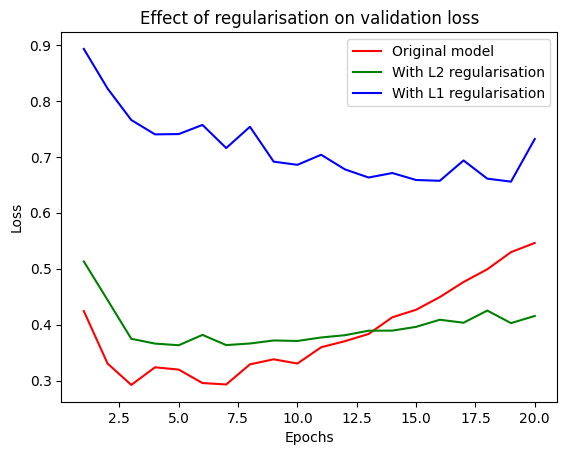

In [7]:
original_val_loss = history_original.history["val_loss"]
l2_val_loss = history_l2_regular.history["val_loss"]
l1_val_loss = history_l1_regular.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, original_val_loss, "r-", label="Original model")
plt.plot(epochs, l2_val_loss, "g-", label="With L2 regularisation")
plt.plot(epochs, l1_val_loss, "b-", label="With L1 regularisation")
plt.title("Effect of regularisation on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()